# Анализ оттока клиентов

Всем привет и добро пожаловать в один из лучших банков страны «Метанпромбанк»! 🏦


Нашей главной задачей станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а также поможет нам составить сегменты клиентов, которые склонны уходить из банка.


«Метанпромбанк» — деньги не пахнут!

# Данные об авторе

Проект выполнил студент Яндекс Практикума Грачев В.И.

# Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск. 

Файл /datasets/bank_scrooge.csv:

- USERID — идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity — количество баллов собственности;
- balance — баланс на счёте;
- products — количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта;
- last_activity — активный клиент;
- EST_SALARY — оценочный доход клиента;
- сhurn — признак оттока.

# Загрузка данных

In [1]:
!pip install phik

,Requirement already satisfied: joblib>=0.14.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.5.1)
,Requirement already satisfied: pandas>=0.25.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.2.4)
,Requirement already satisfied: scipy>=1.5.2 in /opt/conda/lib/python3.9/site-packages (from phik) (1.9.1)
,Requirement already satisfied: numpy>=1.18.0 in /opt/conda/lib/python3.9/site-packages (from phik) (1.21.1)
,Requirement already satisfied: matplotlib>=2.2.3 in /opt/conda/lib/python3.9/site-packages (from phik) (3.3.4)
,Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (0.11.0)
,Requirement already satisfied: python-dateutil>=2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (2.8.1)
,Requirement already satisfied: pillow>=6.2.0 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (8.4.0)
,Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>

In [2]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import ttest_ind
import plotly.express as px
from plotly import graph_objects as go
import phik
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загружаем датасет
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
# Посмотрим предварительную информацию по датасету
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 10000 entries, 0 to 9999
,Data columns (total 12 columns):
, #   Column         Non-Null Count  Dtype  
,---  ------         --------------  -----  
, 0   USERID         10000 non-null  int64  
, 1   score          10000 non-null  float64
, 2   city           10000 non-null  object 
, 3   gender         10000 non-null  object 
, 4   age            9974 non-null   float64
, 5   equity         10000 non-null  int64  
, 6   balance        7705 non-null   float64
, 7   products       10000 non-null  int64  
, 8   credit_card    10000 non-null  int64  
, 9   last_activity  10000 non-null  int64  
, 10  EST_SALARY     10000 non-null  float64
, 11  churn          10000 non-null  int64  
,dtypes: float64(4), int64(6), object(2)
,memory usage: 937.6+ KB


**Вывод по разделу: в датасете 10000 строк и 12 столбцов. Есть пропуски в столбцах age и balance. Не соответствуют единому стилю названия столбцов USERID и EST_SALARY. Тип данных столбцов age и score не соответствует оптимальному.**

# Предобработка данных

In [6]:
# Приведем названия столбцов к единому стилю
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid': 'user_id'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [7]:
# Поменяем тип данных столбцов score и age на целочисленный
data['score'] = data['score'].astype('Int64')
data['age'] = data['age'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 10000 entries, 0 to 9999
,Data columns (total 12 columns):
, #   Column         Non-Null Count  Dtype  
,---  ------         --------------  -----  
, 0   user_id        10000 non-null  int64  
, 1   score          10000 non-null  Int64  
, 2   city           10000 non-null  object 
, 3   gender         10000 non-null  object 
, 4   age            9974 non-null   Int64  
, 5   equity         10000 non-null  int64  
, 6   balance        7705 non-null   float64
, 7   products       10000 non-null  int64  
, 8   credit_card    10000 non-null  int64  
, 9   last_activity  10000 non-null  int64  
, 10  est_salary     10000 non-null  float64
, 11  churn          10000 non-null  int64  
,dtypes: Int64(2), float64(2), int64(6), object(2)
,memory usage: 957.2+ KB


In [8]:
# Проверим столбец с городами на уникальные значения
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [9]:
# Проверим столбец с количеством продуктов на уникальные значения
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

In [10]:
# Удалим аномалии со значением 0, так как человек не может быть клиентом банка при полном отсутствии продуктов
data = data.query('products != 0')

In [11]:
# Посмотрим наличие пропусков
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [12]:
# Количество пропусков в столбце age незначительно, поэтому можем удалить их
data = data.dropna(subset = ['age'])

В столбце balance 2295 пропусков, что значительно (почти четверть от общего числа строк)

In [13]:
# Проверим корреляцию переменных с помощью коэффициента Пирсона
data.loc[:, data.columns !='user_id'].corr()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.000000,-0.012339,0.064787,0.235283,-0.003662,-0.095032,-0.030168,0.164350,0.106076
age,-0.012339,1.000000,0.020581,0.069745,0.017900,-0.122761,-0.007849,-0.039354,-0.050463
equity,0.064787,0.020581,1.000000,0.163793,0.431110,-0.167262,-0.001991,-0.171506,0.270105
balance,0.235283,0.069745,0.163793,1.000000,0.075716,-0.059850,0.024770,0.338800,0.085915
products,-0.003662,0.017900,0.431110,0.075716,1.000000,-0.251562,0.037320,-0.117802,0.301274
credit_card,-0.095032,-0.122761,-0.167262,-0.059850,-0.251562,1.000000,-0.033331,0.035883,-0.130122
last_activity,-0.030168,-0.007849,-0.001991,0.024770,0.037320,-0.033331,1.000000,0.002852,0.169690
est_salary,0.164350,-0.039354,-0.171506,0.338800,-0.117802,0.035883,0.002852,1.000000,0.001893
churn,0.106076,-0.050463,0.270105,0.085915,0.301274,-0.130122,0.169690,0.001893,1.000000


Видим, что у balance присутствует небольшая связь с est_salary (0,34) и со score (0,23). При этом с остальными величинами связь практически отсутствует. Поэтому, ввиду отсутствия логичной замены пропускам, оставим их как есть.

In [14]:
# Проверим данные на наличие явных дубликатов
data.duplicated().sum()

0

In [15]:
# Проверим данные на наличие неявных дубликатов (по столбцу user_id)
data_2 = data[data['user_id'].duplicated(keep=False)].sort_values(by='user_id')
pd.set_option('display.max_rows', None)
data_2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


По построенному датасету видим, что задвоились данные по столбцу user_id, однако видно, что данные в остальных столбцах отличаются, соответственно логично предположить, что это системная ошибка по присваиванию одинаковых user_id. То есть данные оставляем без изменений.

**Вывод по разделу:**

**В ходе предобработки данных выполнили:**
- привели названия столбцов к единому стилю;
- поменяли тип данных столбцов score и age на целочисленный;
- проверили датасет на наличие пропусков, удалили незначительные пропуски в столбце age, оставили пропуски в столбце balance ввиду отсутсвия их логичной замены;
- удалили аномалии - данные со значениием 0 в столбце products;
- проверили данные на явные и неявные дубликаты, в результате чего выяснили, что явные дубликаты отсутствуют, а неявные присутствуют в столбце user_id но их не удаляли, так как они, скорее всего являются технической ошибкой.

# Исследовательский анализ данных

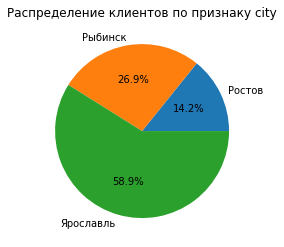

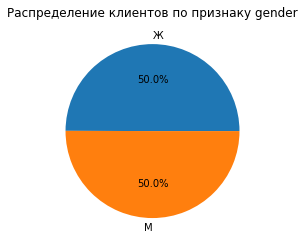

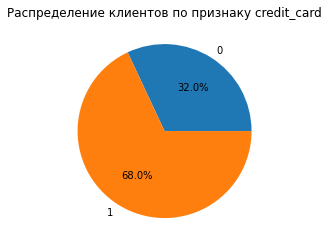

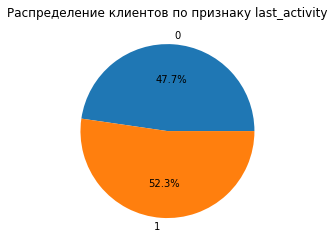

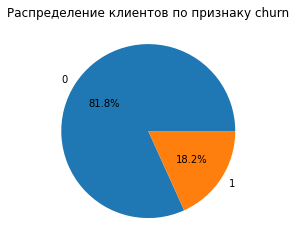

In [16]:
# Исследуем общую информацию о клиентах банка
for column in ['city','gender','credit_card','last_activity','churn']:
    df = data.groupby(column).agg({'user_id': 'count'})
    fig,ax = plt.subplots()
    ax.pie(df['user_id'], labels=df.index, autopct='%1.1f%%')
    ax.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

**Больше половины от общего числа клиентов обслуживаются в городе Ярославль, женщины и мужчины распределены поровну, кредитная карта есть у 68% клиентов, активных клиентов чуть больше - 52,3%, нежели неактивных, отток наблюдается у 18,2% клиентов.**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Проанализируем отток клиентов по количественным признакам**

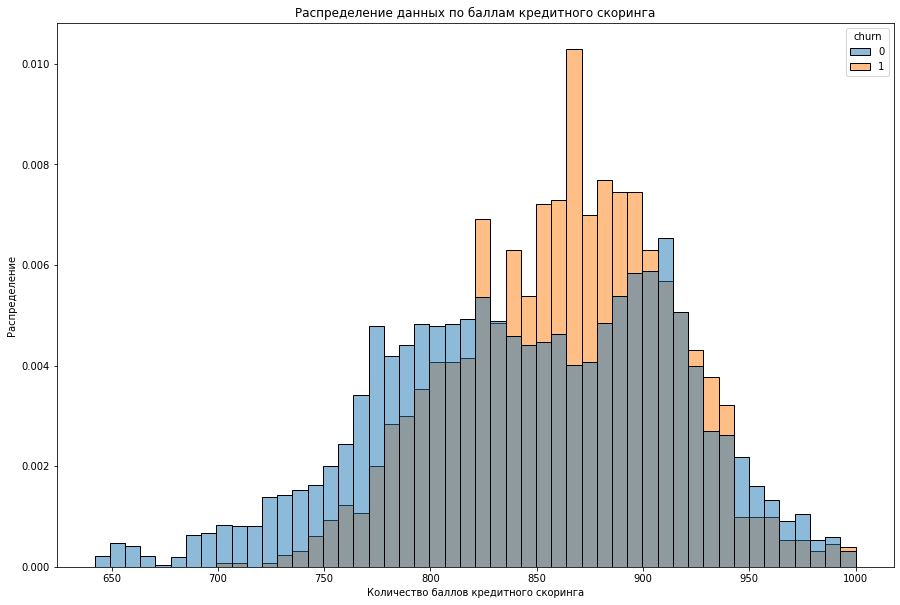

In [17]:
# Посмотрим распределение данных по баллам кредитного скоринга
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=data, x='score', hue='churn', stat='density', common_norm=False, bins = 50)
plt.xlabel('Количество баллов кредитного скоринга')
plt.ylabel('Распределение')
plt.title('Распределение данных по баллам кредитного скоринга')
plt.show()


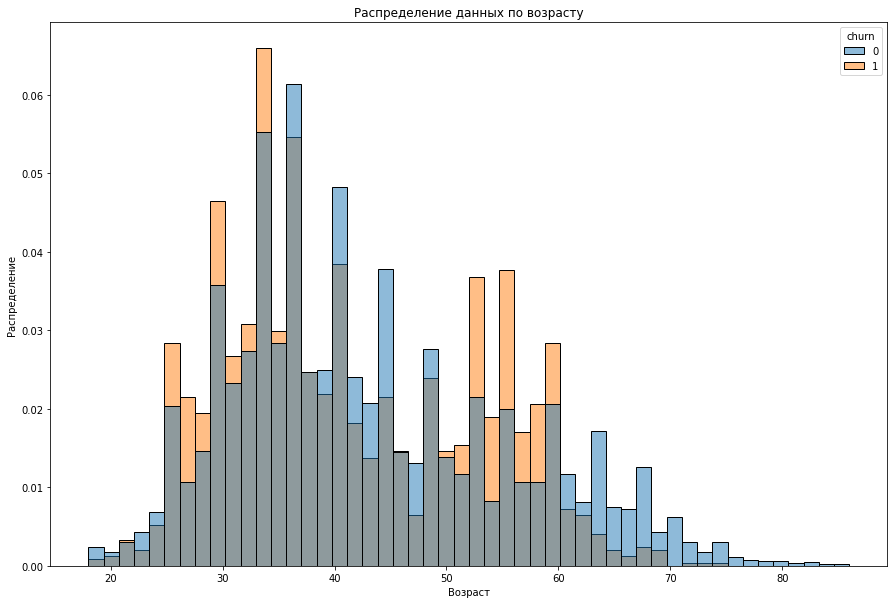

In [18]:
# Посмотрим распределение данных по возрасту
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=data, x='age', hue='churn', stat='density', common_norm=False, bins = 50)
plt.xlabel('Возраст')
plt.ylabel('Распределение')
plt.title('Распределение данных по возрасту')
plt.show()

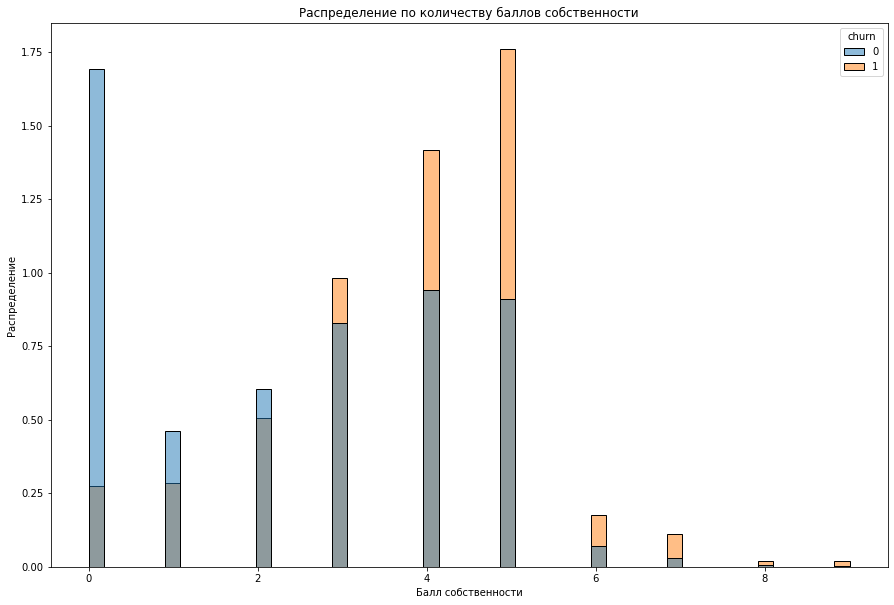

In [19]:
# Посмотрим распределение по количеству баллов собственности
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=data, x='equity', hue='churn', stat='density', common_norm=False, bins = 50)
plt.xlabel('Балл собственности')
plt.ylabel('Распределение')
plt.title('Распределение по количеству баллов собственности')
plt.show()

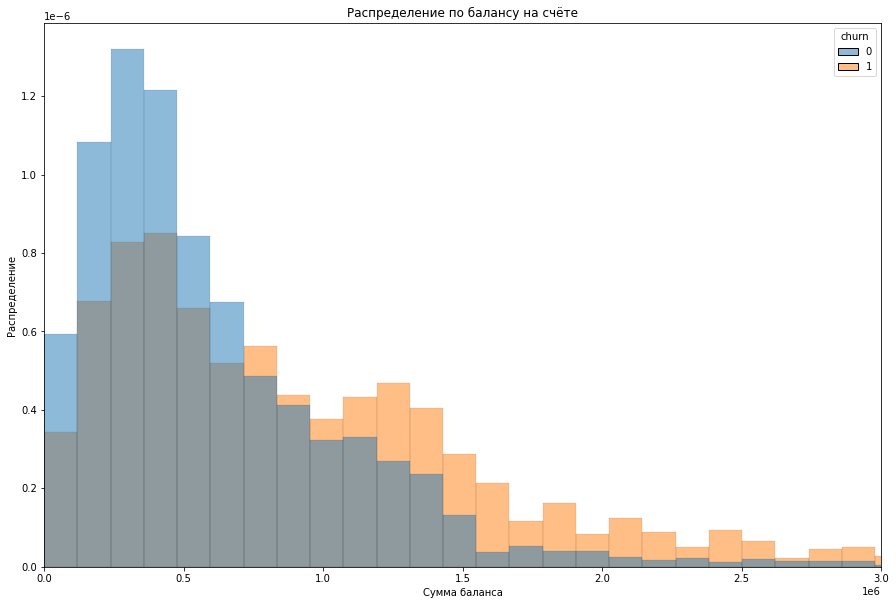

In [20]:
# Посмотрим распределение по балансу на счёте
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=data, x='balance', hue='churn', stat='density', common_norm=False, bins = 1000)
ax.set_xlim([0, 3000000])
plt.xlabel('Сумма баланса')
plt.ylabel('Распределение')
plt.title('Распределение по балансу на счёте')
plt.show()

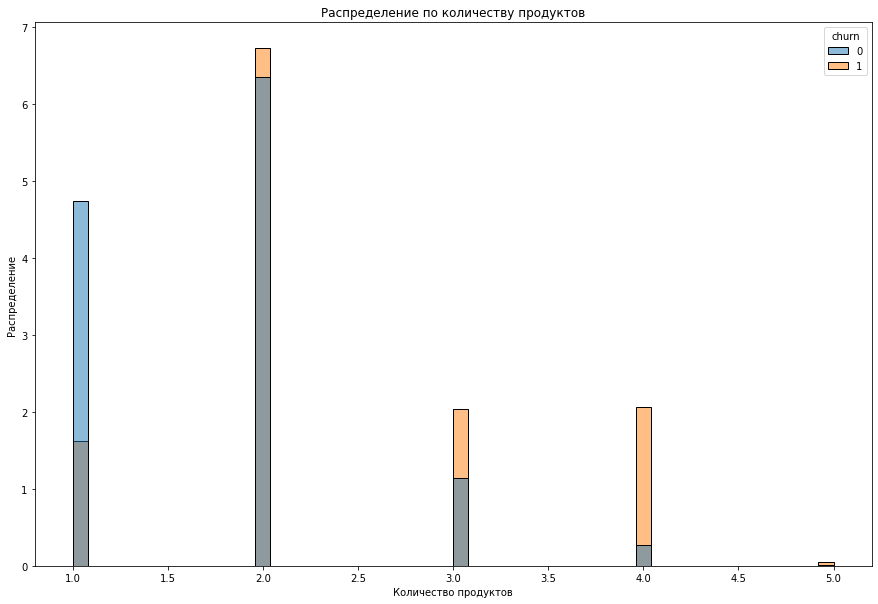

In [21]:
# Посмотрим распределение по количеству продуктов
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=data, x='products', hue='churn', stat='density', common_norm=False, bins = 50)
plt.xlabel('Количество продуктов')
plt.ylabel('Распределение')
plt.title('Распределение по количеству продуктов')
plt.show()

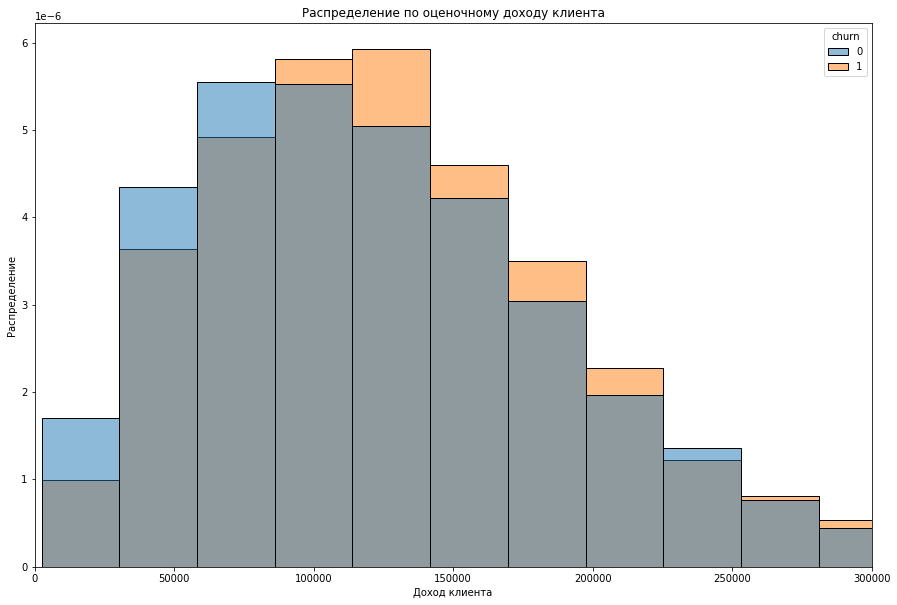

In [22]:
# Посмотрим распределение по оценочному доходу клиента
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=data, x='est_salary', hue='churn', stat='density', common_norm=False, bins = 50)
ax.set_xlim([0, 300000])
plt.xlabel('Доход клиента')
plt.ylabel('Распределение')
plt.title('Распределение по оценочному доходу клиента')
plt.show()

**По вышепостроенным графикам видим следующее:**
- заметен пик оттока пользователей с 820-900 баллами кредитного скоринга;
- видим отток пользователей двух возрастных групп - от 25 до 35 лет и от 50 до 60 лет;
- наблюдаем отток пользователей с 3-9 баллами собственности;
- те, кто имеют больше 1 млн баланса, более склонны к оттоку;
- клиенты, кто имеет 2 продукта и более, склонны к оттоку;
- отток наблюдается среди клиентов с оценочным доходом более 100 тыс. и выше.

**Проанализируем отток клиентов по категориальным признакам**

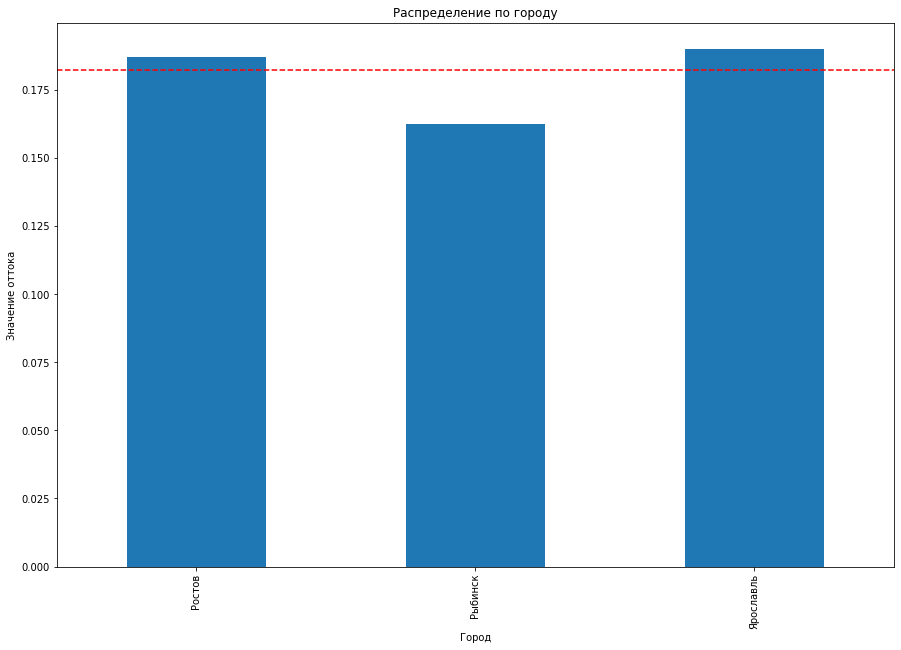

In [23]:
# Посмотрим распределение по городу
fig, ax = plt.subplots(figsize=(15, 10))
data.groupby(['city'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = data['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Город')
plt.ylabel('Значение оттока')
plt.title('Распределение по городу')
plt.show()

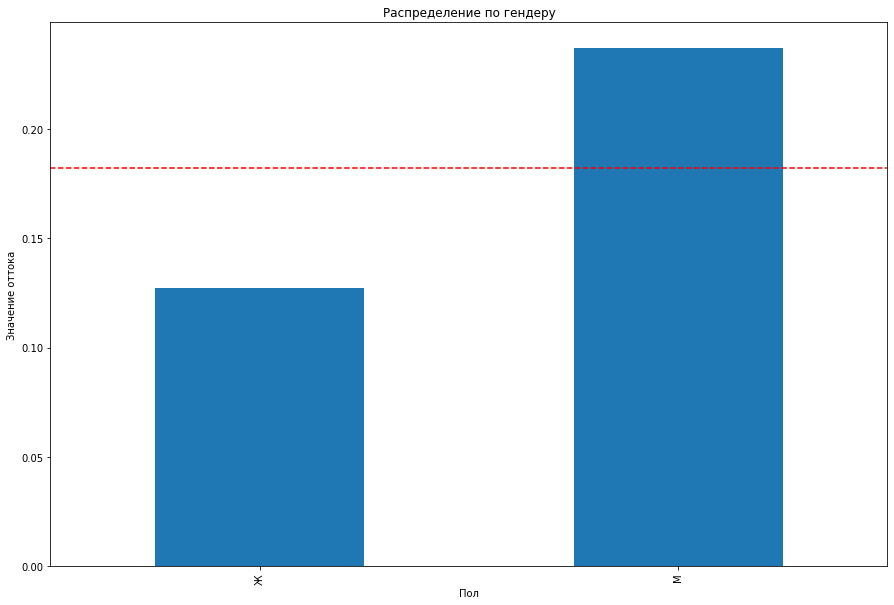

In [24]:
# Посмотрим распределение по гендеру
fig, ax = plt.subplots(figsize=(15, 10))
data.groupby(['gender'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = data['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Пол')
plt.ylabel('Значение оттока')
plt.title('Распределение по гендеру')
plt.show()

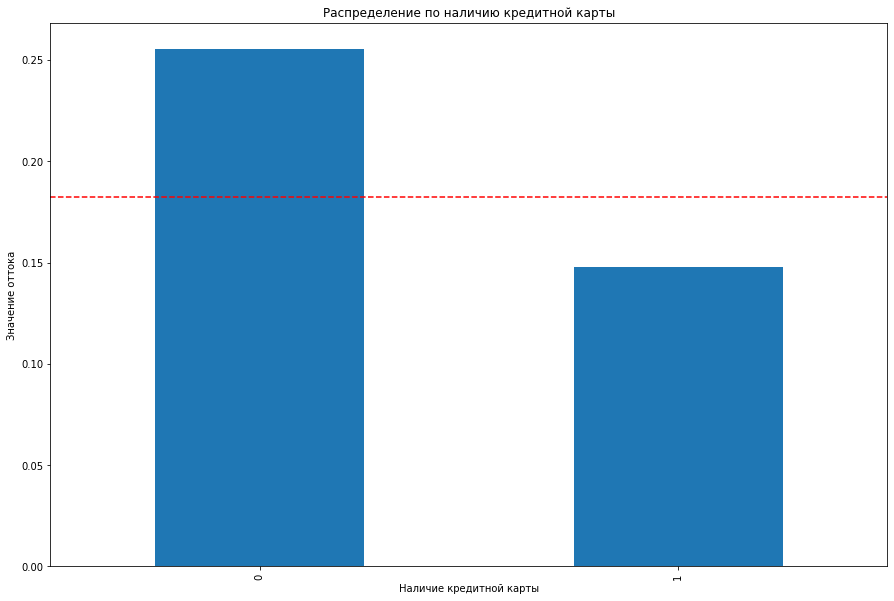

In [25]:
# Посмотрим распределение по наличию кредитной карты
fig, ax = plt.subplots(figsize=(15, 10))
data.groupby(['credit_card'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = data['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Значение оттока')
plt.title('Распределение по наличию кредитной карты')
plt.show()

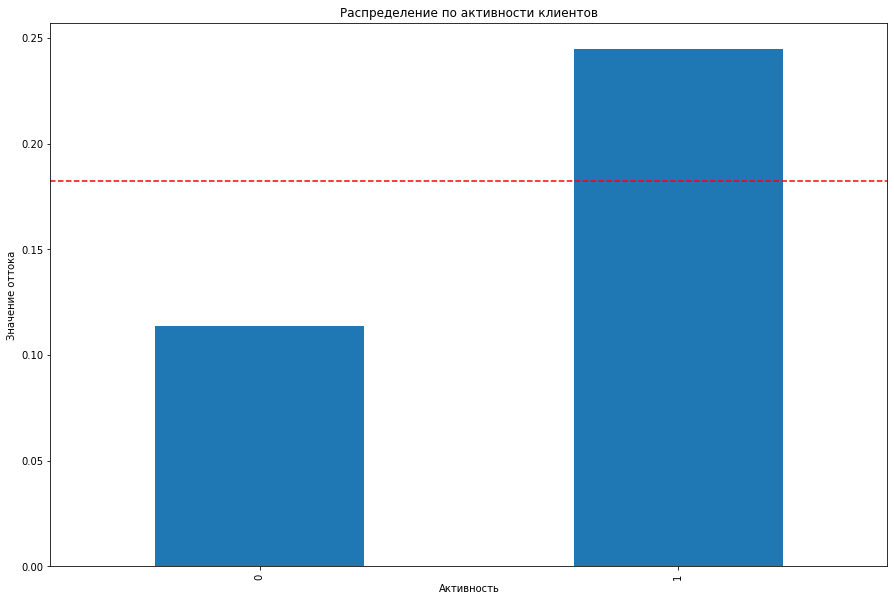

In [26]:
# Посмотрим распределение по активности клиентов
fig, ax = plt.subplots(figsize=(15, 10))
data.groupby(['last_activity'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = data['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Активность')
plt.ylabel('Значение оттока')
plt.title('Распределение по активности клиентов')
plt.show()

**По вышепостроенным графикам видим следующее:**
- Заметно, что в Ростове и Ярославле отток выше;
- Среди мужчин отток выше, чем у женщин;
- Клиенты без кредитной карты имеют наивысший показатель оттока;
- У активных клиентов показатель по оттоку выше.

**Проведем корреляционный анализ**

In [27]:
# Для удобства создадим копию датафрейма и удалим столбец 'user_id'
data_corr=data.copy()
data_corr.drop('user_id', axis= 1, inplace= True)

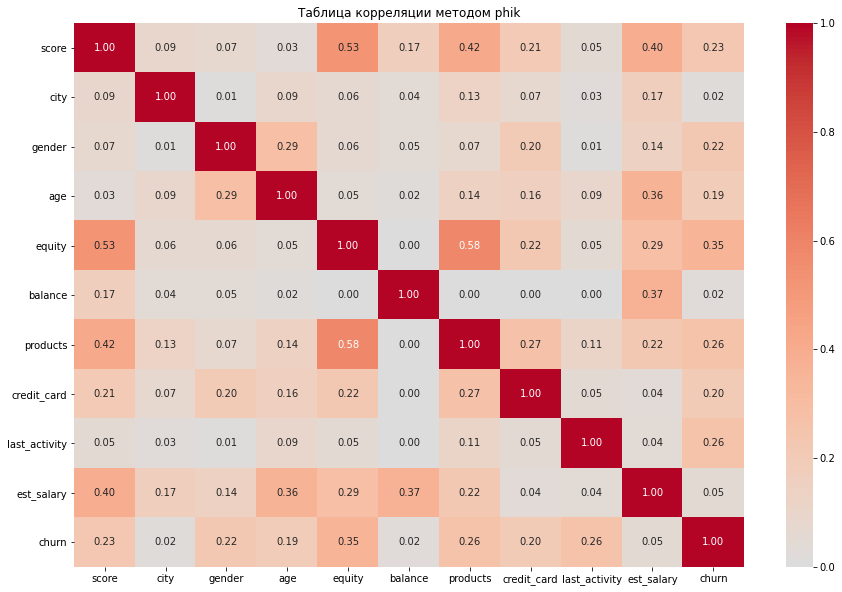

In [28]:
# Построим хитмэп с таблицей корреляции методом phik
continuous_signs = ['score', 'age', 'balance', 'est_salary']
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(data_corr.phik_matrix(interval_cols = continuous_signs),
            center=0,
            annot = True,
            fmt = '.2f',
            cmap='coolwarm',
            ax = axes)
plt.title('Таблица корреляции методом phik')
plt.show()

**Построенная таблица корреляции показывает, что наибольшая связь оттока с количеством баллов собственности, количеством продуктов и активностью.**

**Вывод по разделу:**

**В ходе исследовательского анализа данных выяснили следующее.**

**Анализ оттока по количественным признакам показал, что:**
- заметен пик оттока пользователей с 820-900 баллами кредитного скоринга;
- видим отток пользователей двух возрастных групп - от 25 до 35 лет и от 50 до 60 лет;
- наблюдаем отток пользователей с 3-9 баллами собственности;
- те, кто имеют больше 1 млн баланса, более склонны к оттоку;
- клиенты, кто имеет 2 продукта и более, склонны к оттоку;
- отток наблюдается среди клиентов с оценочным доходом более 100 тыс. и выше.

**Анализ оттока по категориальным признакам показал, что:**
- Заметно, что в Ростове и Ярославле отток выше;
- Среди мужчин отток выше, чем у женщин;
- Клиенты без кредитной карты имеют наивысший показатель оттока;
- У активных клиентов показатель по оттоку выше.

**Корреляционный анализ показал, что отток клиентов больше всего связан с количеством баллов собственности, количеством продуктов и активностью.**


# Составление и проверка статистичеких гипотез

**Сформулируем гипотезы для проверки**

**1. Гипотеза о различии дохода между теми клиентами, что ушли и теми, что остались.**

**2. Гипотеза о различии баллов кредитного скоринга между теми клиентами, что ушли и теми, что остались.**

**Для проверки гипотез будем использовать метод scipy.stats.ttest_ind так как в двух независимых выборках проверется гипотеза о равенстве средних двух генеральных совокупностей**

In [29]:
# Поменяем тип данных столбца 'score' на float64 для проверки гипотезы №2
data['score'] = data['score'].astype('float64')

In [30]:
# Для проверки условий теста разделим данные на ушедших и оставшихся, оставшиеся:
data_stayed = data.loc[data["churn"] == 0]
data_stayed.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8155 entries, 1 to 9999
,Data columns (total 12 columns):
, #   Column         Non-Null Count  Dtype  
,---  ------         --------------  -----  
, 0   user_id        8155 non-null   int64  
, 1   score          8155 non-null   float64
, 2   city           8155 non-null   object 
, 3   gender         8155 non-null   object 
, 4   age            8155 non-null   Int64  
, 5   equity         8155 non-null   int64  
, 6   balance        5889 non-null   float64
, 7   products       8155 non-null   int64  
, 8   credit_card    8155 non-null   int64  
, 9   last_activity  8155 non-null   int64  
, 10  est_salary     8155 non-null   float64
, 11  churn          8155 non-null   int64  
,dtypes: Int64(1), float64(3), int64(6), object(2)
,memory usage: 836.2+ KB


In [31]:
# Для проверки условий теста разделим данные на ушедших и оставшихся, ушедшие:
data_lost = data.loc[data["churn"] == 1]
data_lost.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 1818 entries, 0 to 9994
,Data columns (total 12 columns):
, #   Column         Non-Null Count  Dtype  
,---  ------         --------------  -----  
, 0   user_id        1818 non-null   int64  
, 1   score          1818 non-null   float64
, 2   city           1818 non-null   object 
, 3   gender         1818 non-null   object 
, 4   age            1818 non-null   Int64  
, 5   equity         1818 non-null   int64  
, 6   balance        1806 non-null   float64
, 7   products       1818 non-null   int64  
, 8   credit_card    1818 non-null   int64  
, 9   last_activity  1818 non-null   int64  
, 10  est_salary     1818 non-null   float64
, 11  churn          1818 non-null   int64  
,dtypes: Int64(1), float64(3), int64(6), object(2)
,memory usage: 186.4+ KB


**Проверка гипотезы о различии дохода между теми клиентами, что ушли и теми, что остались.**

- Нулевая гипотеза: пользовательские доходы клиентов что ушли и тех что остались - одинаковые.
- Альтернативная гипотеза: пользовательские доходы клиентов что ушли и тех что остались - разные.
- alpha = 0.05.

In [32]:
alpha = 0.05
results = st.ttest_ind(data_stayed['est_salary'],
                       data_lost['est_salary'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользовательские доходы клиентов что ушли и тех что остались - разные')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: пользовательские доходы клиентов что ушли и тех что остались - одинаковые')

p-value: 0.8354803526840116
,Нет оснований отвергнуть нулевую гипотезу: пользовательские доходы клиентов что ушли и тех что остались - одинаковые


**В результате теста получили, что доходы клиентов что ушли и остались - одинаковые.**

**Проверка гипотезы о различии баллов кредитного скоринга между теми клиентами, что ушли и тех, что остались.**

- Нулевая гипотеза: баллы кредитного скоринга клиентов что ушли и тех что остались - одинаковые.
- Альтернативная гипотеза: баллы кредитного скоринга клиентов что ушли и тех что остались - разные.
- alpha = 0.05.

In [33]:
alpha = 0.05
results = st.ttest_ind(data_stayed['score'],
                       data_lost['score'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользовательские баллы скоринга ушедших клиентов и тех что остались - разные')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: пользовательские баллы скоринга ушедших клиентов и тех что остались одинаковые')

p-value: 1.3179430198200596e-37
,Отвергаем нулевую гипотезу: пользовательские баллы скоринга ушедших клиентов и тех что остались - разные


**В результате теста получили, что баллы кредитного скоринга клиентов что ушли и остались - различаются.**

**Вывод по разделу:**
**Составили две гипотезы и проверили их. В итоге получили, что доходы клиентов, которые ушли и остались - одинаковые, а баллы кредитного скоринга клиентов что ушли и остались - различаются.**

# Сегментация

**Выделим сегменты согласно признакам и их интервалам, полученным в исследовательском анализе.**

**Сегмент_1: Клиенты с баллами кредитного скоринга 820-900 и балансом более 1 млн.**

In [34]:
seg_one = data.query("score >= 820 and score <= 900 and balance >= 1000000")
print('Количество клиентов в сегменте:', seg_one['churn'].count())
print('Средний уровень оттока:', round(seg_one['churn'].mean() * 100, 2))
print(f"Количество отточных клиентов: {seg_one[seg_one['churn'] == 1]['churn'].count()}")

Количество клиентов в сегменте: 793
,Средний уровень оттока: 43.25
,Количество отточных клиентов: 343


**Сегмент_2: Активные клиенты с двумя и более продуктами, которые имеют балл собственности от 3.**

In [35]:
seg_two = data.query("products >= 2 and last_activity == 1 and equity >= 3")
print('Количество клиентов в сегменте:', seg_two['churn'].count())
print('Средний уровень оттока:', round(seg_two['churn'].mean() * 100, 2))
print(f"Количество отточных клиентов: {seg_two[seg_two['churn'] == 1]['churn'].count()}")

Количество клиентов в сегменте: 2468
,Средний уровень оттока: 38.57
,Количество отточных клиентов: 952


**Сегмент_3: Мужчины без кредитной карты из проблемных регионов.**

In [36]:
seg_three_city = ['Ярославль', 'Ростов']
seg_three = data.query("credit_card == 0 and gender == 'М' and city in @seg_three_city")
print('Количество клиентов в сегменте:', seg_three['churn'].count())
print('Средний уровень оттока:', round(seg_three['churn'].mean() * 100, 2))
print(f"Количество отточных клиентов: {seg_three[seg_three['churn'] == 1]['churn'].count()}")

Количество клиентов в сегменте: 890
,Средний уровень оттока: 37.3
,Количество отточных клиентов: 332


**Приоритизируем сегменты по мере убывания отточных клиентов:**
- Сегмент_2: Активные клиенты с двумя и более продуктами, которые имеют балл собственности от 3;
- Сегмент_1: Клиенты с баллами кредитного скоринга 820-900 и балансом более 1 млн;
- Cегмент_3: Мужчины без кредитной карты из проблемных регионов.

**Рекомендации для отдела маркетинга**

**Сегмент_1: Клиенты с баллами кредитного скоринга 820-900 и балансом более 1 млн:**
- Разработать программу для VIP-клиентов с высоким балансом и кредитованностью. Например, более низкие процентные ставки по кредитным программмам и пересмотр объемов кредитования;

**Сегмент_2: Активные клиенты с двумя и более продуктами, которые имеют балл собственности от 3:**
- Внедрить элементы игровых заданий, различные челленджи, связанные с использованием банковских продуктов. Это поддержит вовлеченность и укрепит связь клиента с банком;

**Cегмент_3: Мужчины без кредитной карты из проблемных регионов:**
- Для клиентов без кредитной карты предложить различные программы кешбэка, скидки на определенные продукты или услуги при оформлении карты. Уведомлять мужчин из Ярославля и Ростова о таких акциях через рассылку.

**Вывод по разделу:**

- Выделили сегменты согласно признакам и их интервалам, полученным в исследовательском анализе;

**Приоритизировали сегменты по мере убывания отточных клиентов и дали рекомендации для отдела маркетинга:**

**Сегмент_2: Активные клиенты с двумя и более продуктами, которые имеют балл собственности от 3:**

- Внедрить элементы игровых заданий, различные челленджи, связанные с использованием банковских продуктов. Это поддержит вовлеченность и укрепит связь клиента с банком;

**Сегмент_1: Клиенты с баллами кредитного скоринга 820-900 и балансом более 1 млн:**

- Разработать программу для VIP-клиентов с высоким балансом и кредитованностью. Например, более низкие процентные ставки по кредитным программам и пересмотр объемов кредитования;

**Cегмент_3: Мужчины без кредитной карты из проблемных регионов:**

- Для клиентов без кредитной карты предложить различные программы кешбэка, скидки на определенные продукты или услуги при оформлении карты. Уведомлять мужчин из Ярославля и Ростова о таких акциях через рассылку.


# Общий вывод:

- в датасете 10000 строк и 12 столбцов. Есть пропуски в столбцах age и balance. Не соответствуют единому стилю названия столбцов USERID и EST_SALARY. Тип данных столбцов age и score не соответствует оптимальному;

**В ходе предобработки данных выполнили:**

- привели названия столбцов к единому стилю;
- поменяли тип данных столбцов score и age на целочисленный;
- проверили датасет на наличие пропусков, удалили незначительные пропуски в столбце age, оставили пропуски в столбце balance ввиду отсутсвия их логичной замены;
- удалили аномалии - данные со значениием 0 в столбце products;
- проверили данные на явные и неявные дубликаты, в результате чего выяснили, что явные дубликаты отсутствуют, а неявные присутствуют в столбце user_id но их не удаляли, так как они, скорее всего являются технической ошибкой;

**В ходе исследовательского анализа данных выяснили следующее:**

**Анализ оттока по количественным признакам показал, что:**

- заметен пик оттока пользователей с 820-900 баллами кредитного скоринга;
- видим отток пользователей двух возрастных групп - от 25 до 35 лет и от 50 до 60 лет;
- наблюдаем отток пользователей с 3-9 баллами собственности;
- те, кто имеют больше 1 млн баланса, более склонны к оттоку;
- клиенты, кто имеет 2 продукта и более, склонны к оттоку;
- отток наблюдается среди клиентов с оценочным доходом более 100 тыс. и выше.

**Анализ оттока по категориальным признакам показал, что:**

- Заметно, что в Ростове и Ярославле отток выше;
- Среди мужчин отток выше, чем у женщин;
- Клиенты без кредитной карты имеют наивысший показатель оттока;
- У активных клиентов показатель по оттоку выше.

**Корреляционный анализ показал, что отток клиентов больше всего связан с количеством баллов собственности, количеством продуктов и активностью.**

- Выделили сегменты согласно признакам и их интервалам, полученным в исследовательском анализе;

**Приоритизировали сегменты по мере убывания отточных клиентов и дали рекомендации для отдела маркетинга:**

**Сегмент_2: Активные клиенты с двумя и более продуктами, которые имеют балл собственности от 3:**

- Внедрить элементы игровых заданий, различные челленджи, связанные с использованием банковских продуктов. Это поддержит вовлеченность и укрепит связь клиента с банком;

**Сегмент_1: Клиенты с баллами кредитного скоринга 820-900 и балансом более 1 млн:**

- Разработать программу для VIP-клиентов с высоким балансом и кредитованностью. Например, более низкие процентные ставки по кредитным программам и пересмотр объемов кредитования;

**Cегмент_3: Мужчины без кредитной карты из проблемных регионов:**

- Для клиентов без кредитной карты предложить различные программы кешбэка, скидки на определенные продукты или услуги при оформлении карты. Уведомлять мужчин из Ярославля и Ростова о таких акциях через рассылку.



Презентация: https://disk.yandex.ru/i/DM37TyjahgyufA